In [1]:
#import dependencies
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func, desc, extract

import datetime
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random


In [2]:
# Create the connection engine
engine = create_engine("sqlite:///hawaii.sqlite")

In [3]:
# Reflect Database into ORM class
Base = automap_base()
Base.prepare(engine, reflect=True)
Base.classes.keys()

['measurements', 'station']

In [4]:
#Map measurements class
measurements = Base.classes.measurements

In [5]:
inspector = inspect(engine)
inspector.get_table_names()

columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station VARCHAR(255)
name VARCHAR(255)
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [6]:
#Map stations class
stations = Base.classes.station

In [7]:
# Start a session to query the database
session = Session(engine)

###### Precipitation Analysis

In [8]:
#Getting the latest date
first_date = session.query(measurements.prcp,measurements.date).order_by(measurements.date.desc()).first()
last_date = datetime.datetime.strptime(str(first_date.date), '%Y-%m-%d') - datetime.timedelta(days=365)

prcp_data = session.query(measurements.date,measurements.prcp).filter(measurements.date > last_date ).group_by(measurements.date).all()
prcp_data_df = pd.DataFrame(prcp_data)
prcp_data_df.set_index(["date"])


,prcp
date,
2016-08-24,1.45
2016-08-25,0.11
2016-08-26,0.01
2016-08-27,0.12
2016-08-28,2.07
2016-08-29,0.90
2016-08-30,0.05
2016-08-31,2.46
2016-09-01,0.01


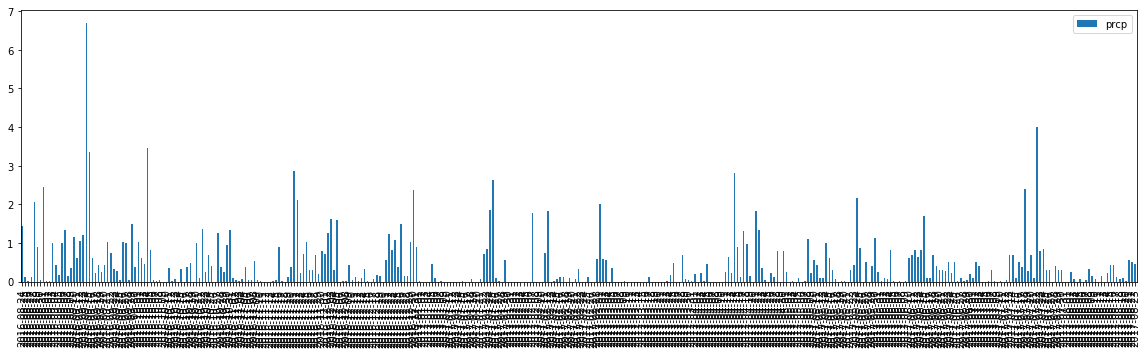

In [70]:
# Pandas can also plot multiple columns if the DataFrame includes them
precipitation_plot = prcp_data_df.plot(kind="bar", figsize=(20,5))

# PandasPlot.set_xticklabels() can be used to set the tick labels as well
precipitation_plot.set_xticklabels(prcp_data_df["date"], rotation=90)

plt.xlabel = ("Dates")
plt.ylabel = ("Precipitation")
plt.title = ("Precipitation Vs Date")

plt.show()

##### Station Analysis

In [11]:
#query to count the total number of stations
total_stations = session.query(stations).count()
print(total_stations)

9


In [12]:
#Query to find the most active station
observation_count_per_station = session.query(measurements.station,func.count(measurements.prcp)).\
    group_by(measurements.station).order_by(func.count(measurements.prcp).desc()).all()
observation_count_per_station

[('USC00519281', 2772),
 ('USC00513117', 2696),
 ('USC00519397', 2685),
 ('USC00519523', 2572),
 ('USC00516128', 2484),
 ('USC00514830', 1937),
 ('USC00511918', 1932),
 ('USC00517948', 683),
 ('USC00518838', 342)]

In [13]:
#The most active station is
active_station = session.query(stations.name).filter(stations.station == 'USC00519281').all()
print(f"The most active station is {active_station}")

The most active station is [('WAIHEE 837.5, HI US',)]


In [79]:
first_date_tobs = session.query(measurements.tobs,measurements.date,stations.name).order_by(measurements.date.desc()).first()
last_date_tobs = datetime.datetime.strptime(str(first_date_tobs.date), '%Y-%m-%d') - datetime.timedelta(days=365)

data_tobs_past_year = session.query(measurements.date,measurements.station,measurements.tobs).filter(measurements.date > last_date_tobs ).all()
data_tobs_past_year_df = pd.DataFrame(data_tobs_past_year)
data_tobs_past_year_df

,date,station,tobs
0,2016-08-24,USC00519397,79
1,2016-08-25,USC00519397,80
2,2016-08-26,USC00519397,79
3,2016-08-27,USC00519397,77
4,2016-08-28,USC00519397,78
5,2016-08-29,USC00519397,78
6,2016-08-30,USC00519397,79
7,2016-08-31,USC00519397,80
8,2016-09-01,USC00519397,81
9,2016-09-02,USC00519397,80


In [76]:
#Getting the latest date and station ID for station with highest tobs
first_date_tobs1 = session.query(measurements.tobs,measurements.date,stations.name).order_by(measurements.date.desc()).first()
last_date_tobs1 = datetime.datetime.strptime(str(first_date_tobs1.date), '%Y-%m-%d') - datetime.timedelta(days=365)

data_tobs_past_year1 = session.query(measurements.date,measurements.station,measurements.tobs,func.count(measurements.tobs)).filter(measurements.date > last_date_tobs ).group_by(measurements.station).order_by(func.count(measurements.tobs).desc()).all()
data_tobs_past_year1

[('2017-08-23', 'USC00519397', 81, 358),
 ('2017-08-18', 'USC00519281', 79, 351),
 ('2017-07-31', 'USC00513117', 77, 342),
 ('2017-08-23', 'USC00516128', 76, 327),
 ('2017-08-23', 'USC00519523', 82, 313),
 ('2017-08-23', 'USC00514830', 82, 264),
 ('2017-07-28', 'USC00517948', 80, 60)]

In [77]:
#The station with highest temperature observation data
active_station_tobs = session.query(stations.name).filter(stations.station == "USC00519397").all()
print(f"The station with highest temperature observation data is {active_station_tobs}")

The station with highest temperature observation data is [('WAIKIKI 717.2, HI US',)]


In [83]:
#Plot histogram


data_tobs_past_year_df.hist(data_tobs_past_year_df["tobs"], bins = 12, normed=1, facecolor='green', alpha=0.75)

plt.xlabel('Temperature Observation Data')
plt.ylabel('Frequesncy')
plt.title("Histogram of Tobs")


plt.show()


TypeError: 'Series' objects are mutable, thus they cannot be hashed

###### Temperature Analysis

In [48]:
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
#     temp_min = session.query(func.min(measurements.tobs)).filter(measurements.date >= start_date).\
#                              filter(measurements.date <= end_date).all()
#     temp_avg = session.query(func.avg(measurements.tobs)).filter(measurements.date >= start_date).\
#                              filter(measurements.date <= end_date).all() 
#     temp_max = session.query(func.max(measurements.tobs)).filter(measurements.date >= start_date).\
#                              filter(measurements.date <= end_date).all()
    return session.query(func.min(measurements.tobs), func.avg(measurements.tobs), func.max(measurements.tobs)).\
        filter(measurements.date >= start_date).filter(measurements.date <= end_date).all()
    #return (temp_min,temp_avg,temp_max) 
# print(calc_temps('2012-03-05', '2018-01-05'))

temp=calc_temps('2012-03-05', '2018-01-05')
print(temp)



[(53, 73.31366058453092, 87)]


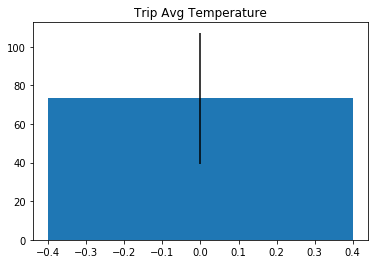

In [69]:
# Pandas can also plot multiple columns if the DataFrame includes them
bar_plot = plt.bar(0, height = temp[0][1],yerr = temp[0][2] - temp[0][0])
plt.ylabel = ("Temp(F)")
plt.title("Trip Avg Temperature")

plt.show()